In [16]:
import pandas as pd
import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as ss
from sklearn.preprocessing import MinMaxScaler


In [52]:
#Input data
df = pd.read_excel("Booksales 2022-24.xlsx")
# Replace NA values in 'Famille' column with 'Unknown'
df['Famille'] = df['Famille'].fillna('Unknown')

#Delete companies orders as it is totally different than private customers
df = df[df['client_bill_comp_name'].isna()]

display(df)


,ean13,titre,auteur,editeur,quantity,code_rayon,unit_normal_pricettc,client_bill_email,order_number,order_id,creation_date,client_bill_comp_name,Format,Language,Nom rayon,Famille
0,9782848931463,Et il ne restera que poussière,Cornwell Patricia,Editions des Deux Terres,1,NaN,9.0,P 1,2705930,4634620,2024-01-01,NaN,ePub,Français,NaN,Unknown
1,9782253174332,Cadavre X,Cornwell Patricia,Le Livre de Poche,1,NaN,9.0,P 1,2705930,4634620,2024-01-01,NaN,ePub,Français,NaN,Unknown
2,9782290249949,La part des anges,Combes Bruno,J'ai Lu,1,NaN,13.4,P 2,2705931,4634621,2024-01-01,NaN,NaN,Français,LIT. FRANCOPHONE POCHE,LITTERATURE
3,9782221116081,San-Antonio,San-Antonio,Robert Laffont,1,NaN,44.3,P 3,2705932,4634622,2024-01-01,NaN,NaN,Français,POLICIER GF,LITTERATURE
4,9791034763160,Pépin et Olivia,Jourdy Camille,Editions Dupuis,1,NaN,30.2,P 4,2705933,4634623,2024-01-01,NaN,NaN,Français,BD JEUNESSE,BD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928979,9782212571592,Au risque d'être soi,Brousse Myriam,Eyrolles,1,NaN,23.9,P 5012,2525201,4404138,2022-12-31,NaN,NaN,Français,SANTE GENERALITES,LOISIRS PRATIQUE
928980,9782501135665,Votre corps a une mémoire,Brousse Myriam,Marabout,1,NaN,11.7,P 5012,2525201,4404138,2022-12-31,NaN,NaN,Français,SANTE GENERALITES,LOISIRS PRATIQUE
928981,9781783788217,Dangers of Smoking in Bed,Enriquez Mariana,Granta Publications,1,NaN,16.5,P 128520,2525202,4404139,2022-12-31,NaN,NaN,Anglais,FICTION POCKET,LANGUES EN VO
928982,9782070323517,Les faits et les mythes,Beauvoir Simone de,Editions Gallimard,1,NaN,18.5,P 128520,2525202,4404139,2022-12-31,NaN,NaN,Français,SOCIO SOCIALISATION,SCIENCES HUMAINES


/var/folders/fl/rm_vjrmx2wbc9bzm_ht_0sl80000gn/T/ipykernel_37225/28727216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['creation_date'] = pd.to_datetime(sales_df['creation_date'])


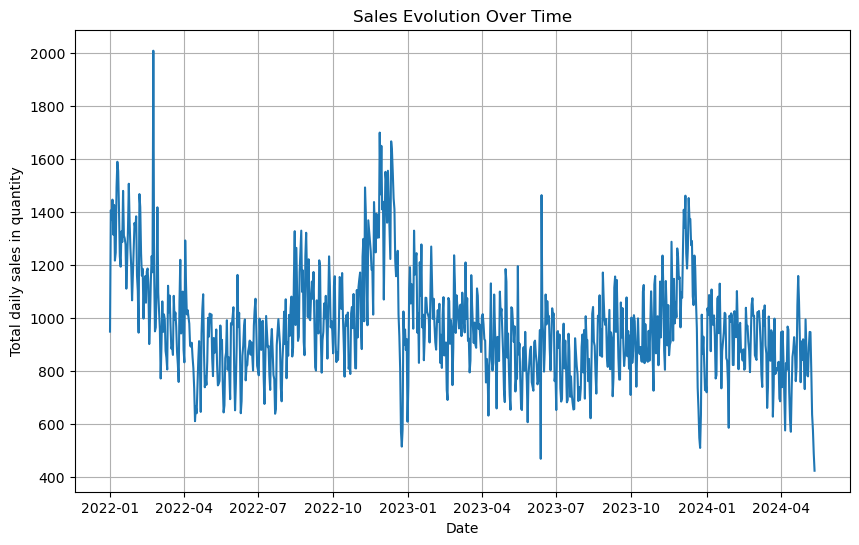

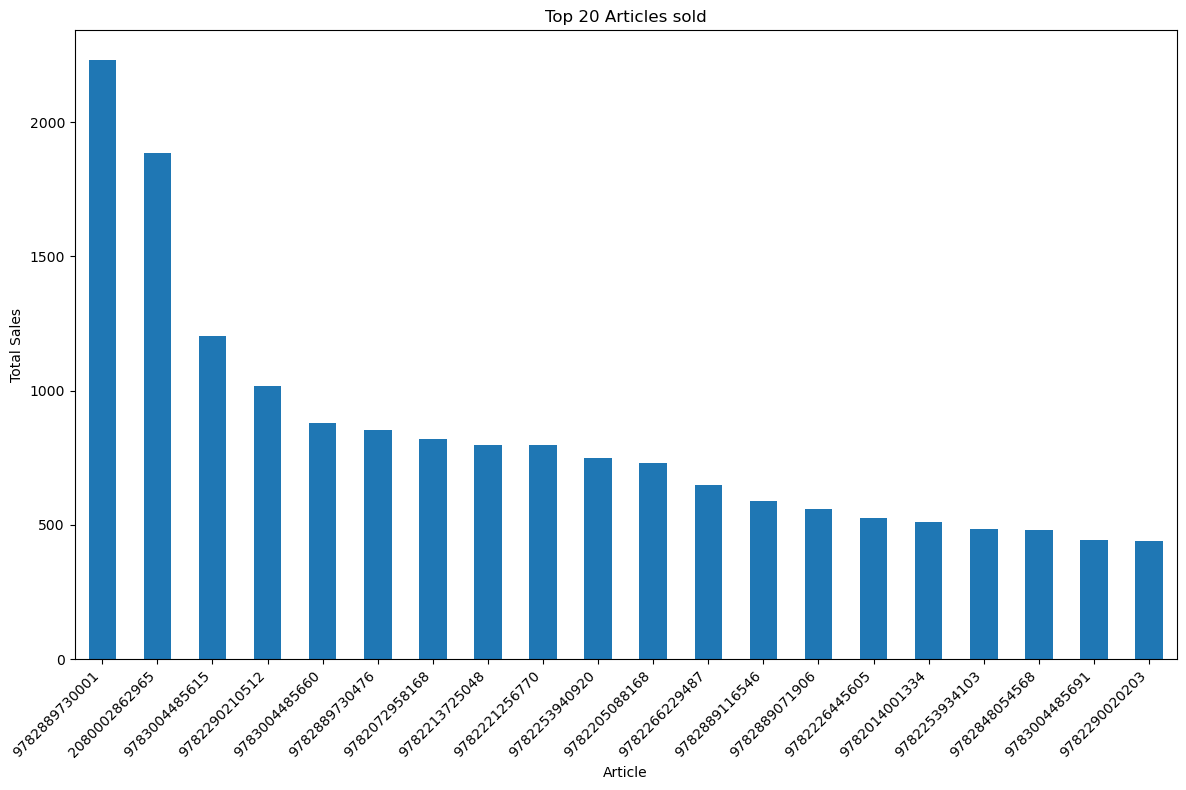

In [53]:
sales_df = df[['quantity', 'creation_date', 'ean13']]

# Ensure the 'Date' column is in datetime format
sales_df['creation_date'] = pd.to_datetime(sales_df['creation_date'])

# Group by date and sum the sales
sales_by_date = sales_df.groupby('creation_date')['quantity'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-')
plt.title('Sales Evolution Over Time')
plt.xlabel('Date')
plt.ylabel('Total daily sales in quantity')
plt.grid(True)
plt.show()

# Group by 'Article' and sum the sales
sales_by_article = sales_df.groupby('ean13')['quantity'].sum()

# Select the top 20 articles based on total sales
top_20_articles = sales_by_article.nlargest(20)

# Filter the sales data to keep only the top 20 articles
top_20_sales = sales_by_article[sales_by_article.index.isin(top_20_articles.index)]

# Sort the top 20 articles by sales in decreasing order
top_20_sales = top_20_sales.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
top_20_sales.plot(kind='bar')
plt.title('Top 20 Articles sold')
plt.xlabel('Article')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

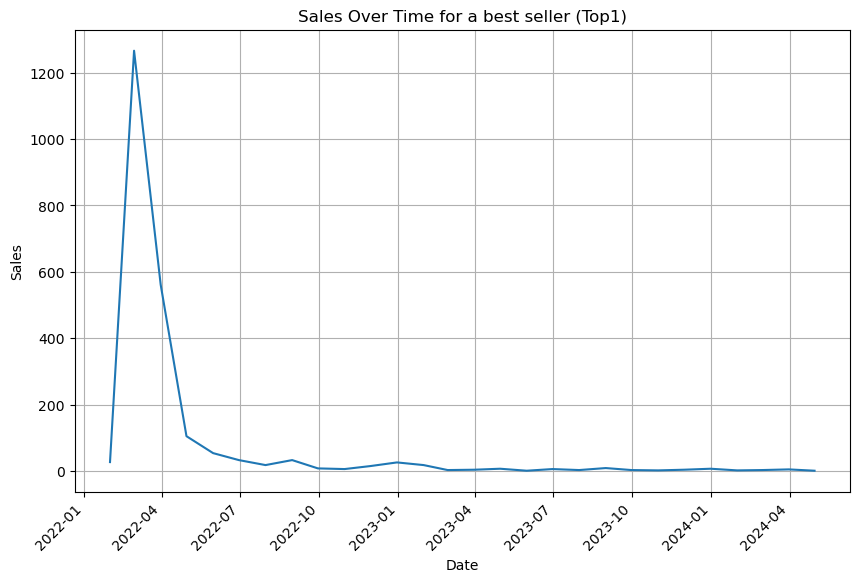

In [54]:
sales_df = df[['quantity', 'creation_date', 'ean13']]

book_sales = sales_df[sales_df['ean13'] == 9782889730001]

#sales_by_date = sales_df.groupby('creation_date')['quantity'].sum()
grouped_data = book_sales.groupby(pd.Grouper(key='creation_date', freq='M'))['quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped_data['creation_date'], grouped_data['quantity'], linestyle='-')
plt.title("Sales Over Time for a best seller (Top1)")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

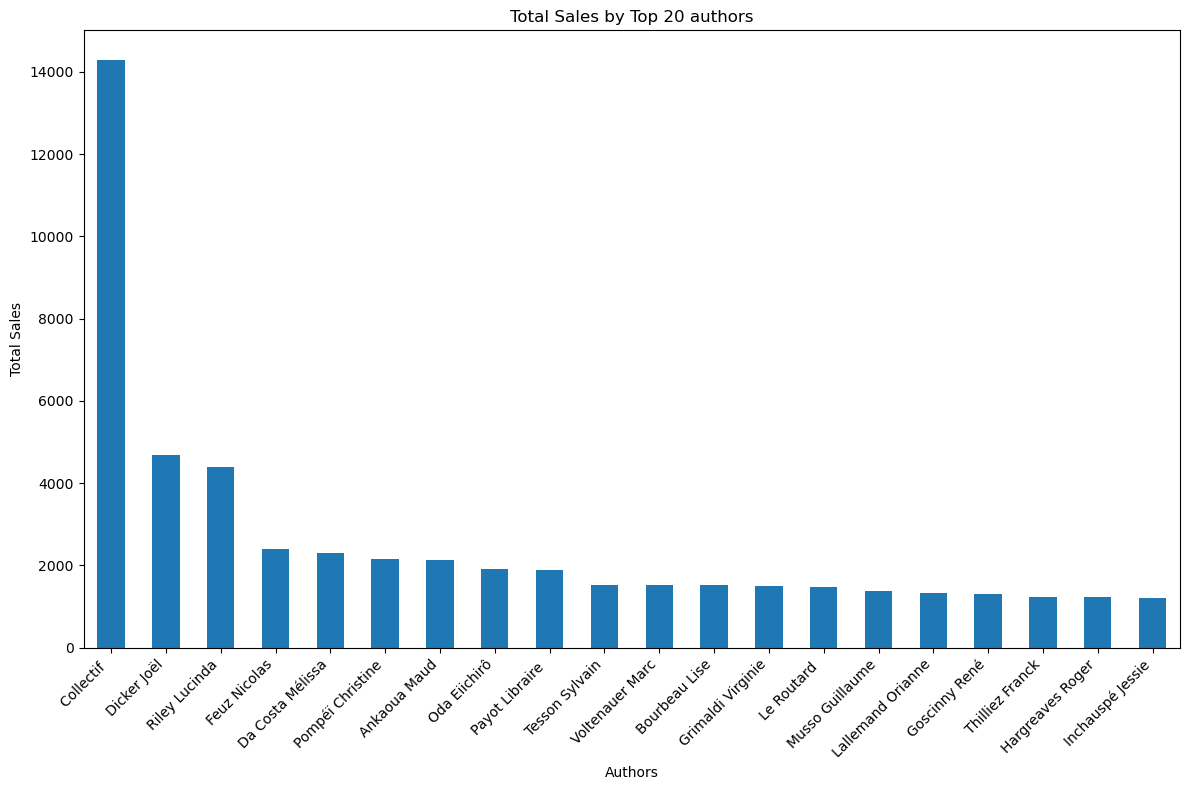

In [55]:
#Top 20 sales by authors

author_df = df[['quantity', 'creation_date', 'auteur']]

# Group by 'Article' and sum the sales
sales_by_author = author_df.groupby('auteur')['quantity'].sum()

# Select the top 20 articles based on total sales
top_20_author = sales_by_author.nlargest(20)

# Filter the sales data to keep only the top 20 articles
top_20_author = sales_by_author[sales_by_author.index.isin(top_20_author.index)]

# Sort the top 20 articles by sales in decreasing order
top_20_author = top_20_author.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
top_20_author.plot(kind='bar')
plt.title('Total Sales by Top 20 authors')
plt.xlabel('Authors')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


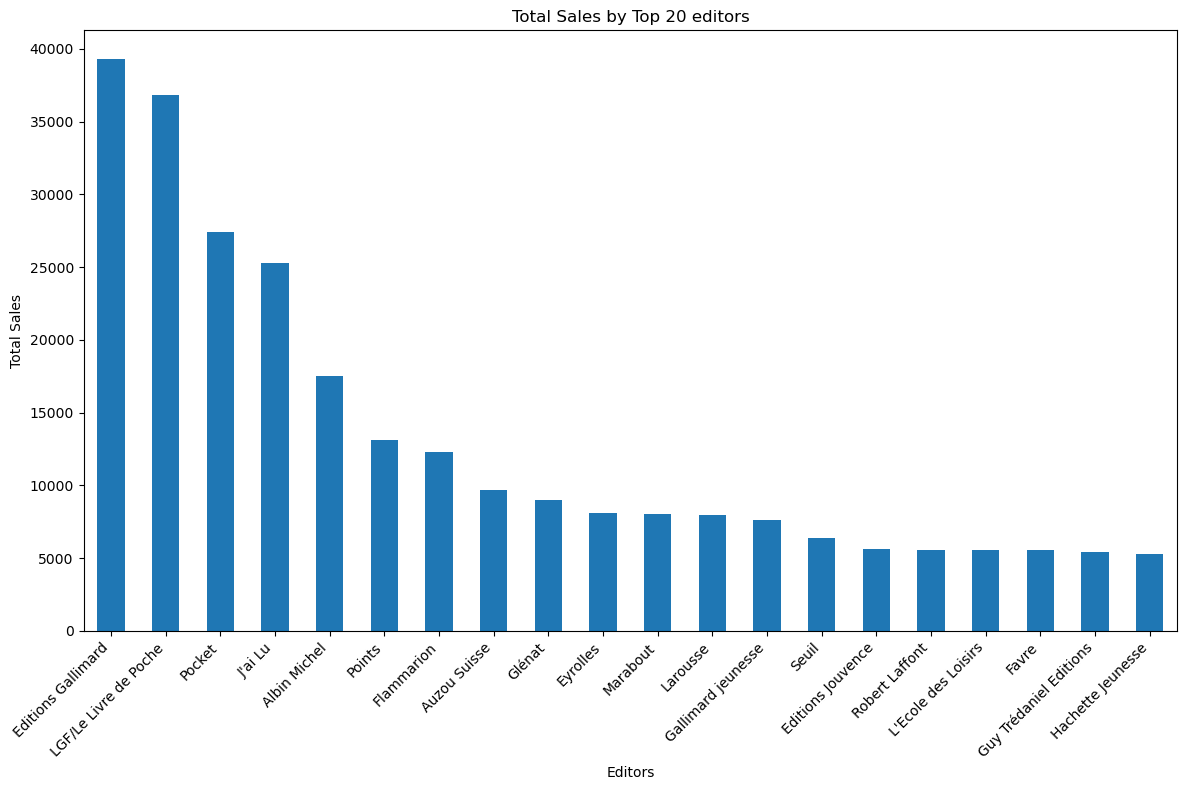

In [56]:
#Top 20 sales by editors

editor_df = df[['quantity', 'creation_date', 'editeur']]

# Group by 'Article' and sum the sales
sales_by_editor = editor_df.groupby('editeur')['quantity'].sum()

# Select the top 20 articles based on total sales
top_20_editor = sales_by_editor.nlargest(20)

# Filter the sales data to keep only the top 20 articles
top_20_editor = sales_by_editor[sales_by_editor.index.isin(top_20_editor.index)]

# Sort the top 20 articles by sales in decreasing order
top_20_editor = top_20_editor.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8)) 
top_20_editor.plot(kind='bar')
plt.title('Total Sales by Top 20 editors')
plt.xlabel('Editors')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

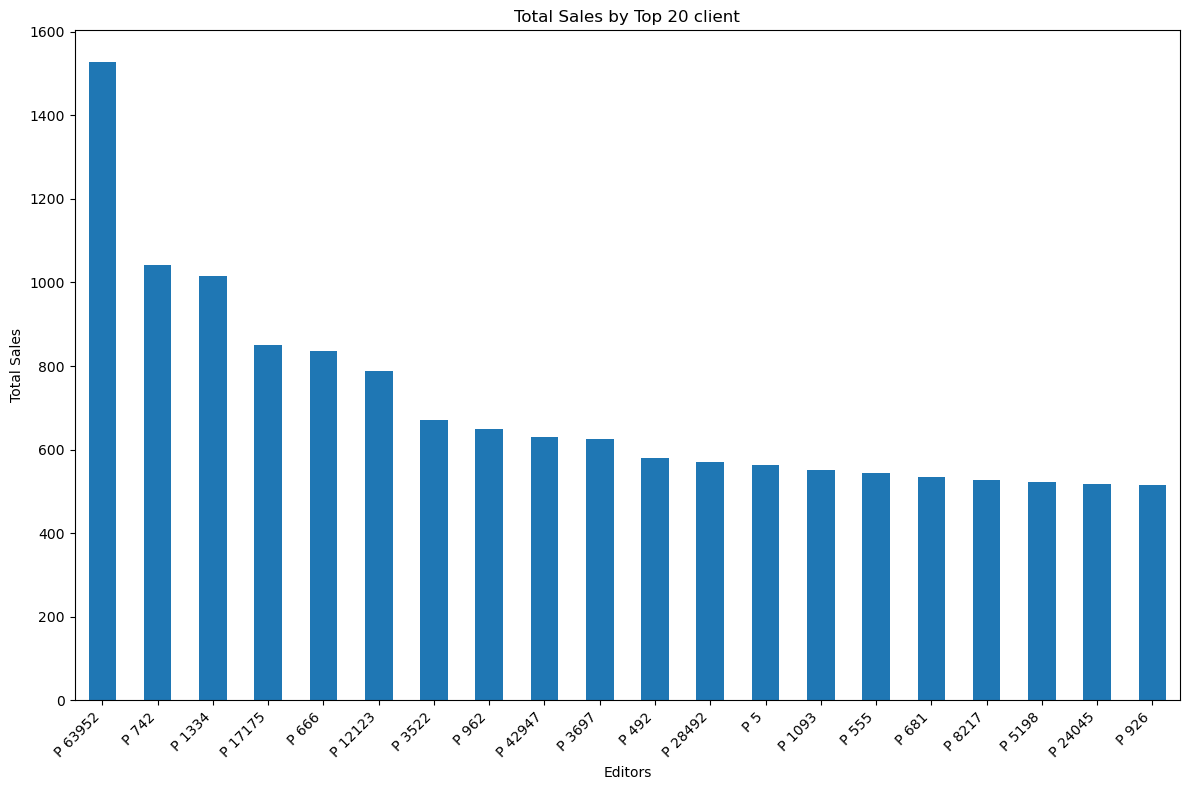

In [57]:
#Top 20 sales by client

editor_df = df[['quantity', 'creation_date', 'client_bill_email']]

# Group by 'Article' and sum the sales
sales_by_editor = editor_df.groupby('client_bill_email')['quantity'].sum()

# Select the top 20 articles based on total sales
top_20_editor = sales_by_editor.nlargest(20)

# Filter the sales data to keep only the top 20 articles
top_20_editor = sales_by_editor[sales_by_editor.index.isin(top_20_editor.index)]

# Sort the top 20 articles by sales in decreasing order
top_20_editor = top_20_editor.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8)) 
top_20_editor.plot(kind='bar')
plt.title('Total Sales by Top 20 client')
plt.xlabel('Client')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
#Features that will be used for K-means clustering method

#print(df.head())
df_sales = df[['client_bill_email', 'quantity', 'Famille', 'ean13', 'order_number']]

df_features_overall = df_sales.groupby(['client_bill_email']).agg({
    'quantity':'sum',
    'order_number':'nunique',
    'ean13':'nunique',
    'Famille':'nunique'
    })

df_features_overall.columns = ['units','orders','unique_products_bought','unique_categories_bought']

Text(0, 0.5, 'Units')

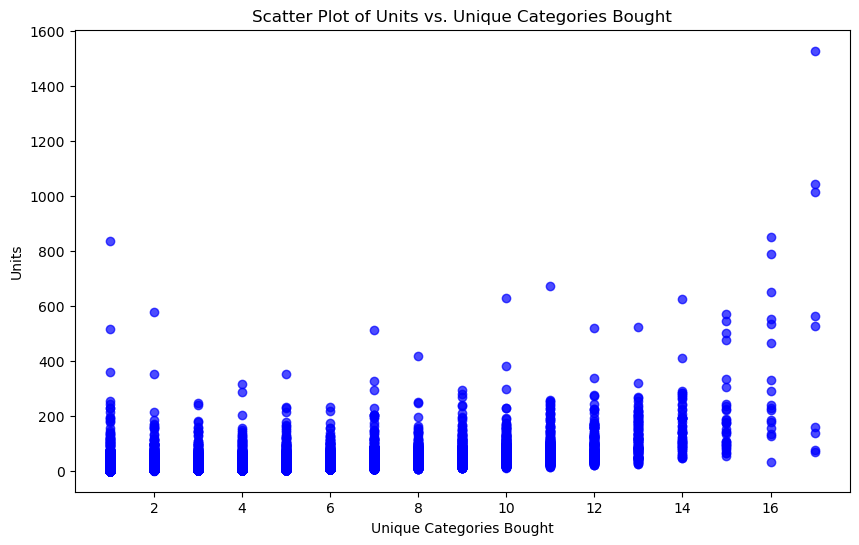

In [59]:
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.scatter(df_features_overall['unique_categories_bought'], df_features_overall['units'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Units vs. Unique Categories Bought')
plt.xlabel('Unique Categories Bought')
plt.ylabel('Units')

                             units    orders  unique_products_bought  \
units                     1.000000  0.816397                0.989747   
orders                    0.816397  1.000000                0.818232   
unique_products_bought    0.989747  0.818232                1.000000   
unique_categories_bought  0.644837  0.700567                0.647770   

                          unique_categories_bought  
units                                     0.644837  
orders                                    0.700567  
unique_products_bought                    0.647770  
unique_categories_bought                  1.000000  


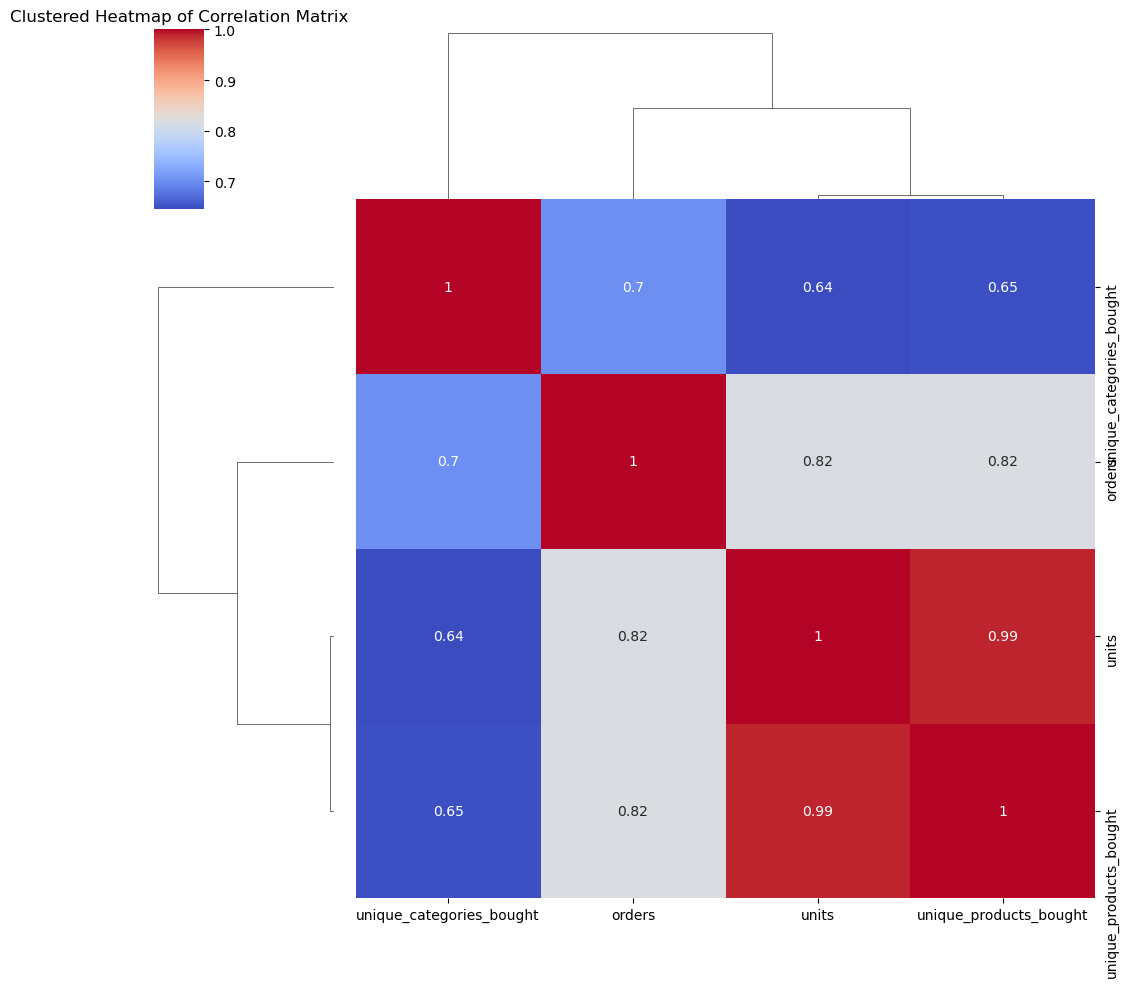

In [60]:
filtered_df = df_features_overall[df_features_overall['orders'] <= 100]

correlation_matrix = filtered_df.corr()
print(correlation_matrix)
import seaborn as sns
# Generate a clustermap
sns.clustermap(correlation_matrix, cmap="coolwarm", annot=True)

plt.title('Clustered Heatmap of Correlation Matrix')
plt.show()

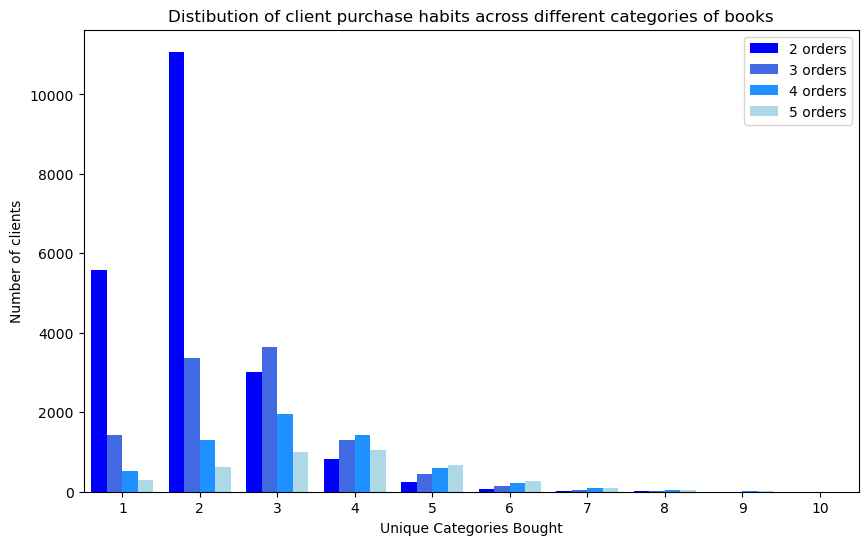

In [61]:
#Distibution of number of categories bought depending on the number of orders
##Create a group df for each number of orders
### only 1 order
df_multiple_orders = df_features_overall[df_features_overall['orders'] == 1]
df_agg = df_multiple_orders.reset_index().groupby(['unique_categories_bought', 'orders']).agg({
    'client_bill_email': 'nunique',  # Count of unique clients
})
df_agg_graph = df_agg.reset_index()

### 2 orders
df_multiple_orders2 = df_features_overall[df_features_overall['orders'] == 2]
df_agg2 = df_multiple_orders2.reset_index().groupby(['unique_categories_bought', 'orders']).agg({
    'client_bill_email': 'nunique',  # Count of unique clients
})
df_agg_graph2 = df_agg2.reset_index()

### 3 orders
df_multiple_orders3 = df_features_overall[df_features_overall['orders'] == 3]
df_agg3 = df_multiple_orders3.reset_index().groupby(['unique_categories_bought', 'orders']).agg({
    'client_bill_email': 'nunique',  # Count of unique clients
})
df_agg_graph3 = df_agg3.reset_index()

### 4 orders
df_multiple_orders4 = df_features_overall[df_features_overall['orders'] == 4]
df_agg4 = df_multiple_orders4.reset_index().groupby(['unique_categories_bought', 'orders']).agg({
    'client_bill_email': 'nunique',  # Count of unique clients
})
df_agg_graph4 = df_agg4.reset_index()

### 5 orders
df_multiple_orders5 = df_features_overall[df_features_overall['orders'] == 5]
df_agg5 = df_multiple_orders5.reset_index().groupby(['unique_categories_bought', 'orders']).agg({
    'client_bill_email': 'nunique',  # Count of unique clients
})
df_agg_graph5 = df_agg5.reset_index()


width=0.2
plt.figure(figsize=(10, 6))
#hist = plt.bar(df_agg_graph['unique_categories_bought']-0.3, df_agg_graph['client_bill_email'], width) #we exclude this line as the majority of client order once during the period, makes the other series not easy to read
hist = plt.bar(df_agg_graph2['unique_categories_bought']-0.3, df_agg_graph2['client_bill_email'], width, color = 'blue')
hist = plt.bar(df_agg_graph3['unique_categories_bought']-0.1, df_agg_graph3['client_bill_email'], width, color = 'royalblue')
hist = plt.bar(df_agg_graph4['unique_categories_bought']+0.1, df_agg_graph4['client_bill_email'], width, color = 'dodgerblue')
hist = plt.bar(df_agg_graph5['unique_categories_bought']+0.3, df_agg_graph5['client_bill_email'], width, color = 'lightblue')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlim(0.5, 10.5)
plt.title('Distibution of client purchase habits across different categories of books')
plt.xlabel('Unique Categories Bought')
plt.ylabel('Number of clients')
plt.legend(["2 orders", "3 orders", "4 orders", "5 orders"]) 


Text(0, 0.5, 'Number of clients')

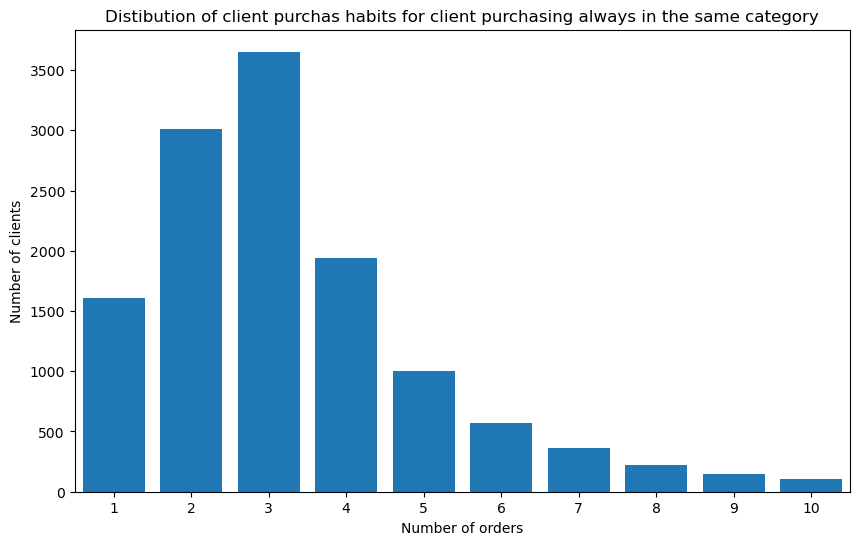

In [62]:
df_one_category = df_features_overall[df_features_overall['unique_categories_bought'] == 3]

df_agg2 = df_one_category.reset_index().groupby(['unique_categories_bought', 'orders']).agg({
    'client_bill_email': 'nunique',  # Count of unique clients
})

df_agg2_graph = df_agg2.reset_index()
plt.figure(figsize=(10, 6))
hist = plt.bar(df_agg2_graph['orders'], df_agg2_graph['client_bill_email'])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlim(0.5, 10.5)
plt.title('Distibution of client purchas habits for client purchasing always in the same category')
plt.xlabel('Number of orders')
plt.ylabel('Number of clients')

In [63]:
df_sales2 = df[['client_bill_email', 'quantity', 'Famille']]

# Replace NA values in 'Famille' column with 'Unknown'
df_sales2['Famille'] = df_sales2['Famille'].fillna('Unknown')

df_category_features_s = df_sales2.groupby(['client_bill_email', 'Famille']).agg({'quantity':'sum'})


# add overall sales
df_category_features_s = df_category_features_s.merge(df_features_overall[['units']], on=['client_bill_email'])

# convert to %
df_category_features_s['Qty_perc'] = df_category_features_s['quantity']/df_category_features_s['units']
#print(df_category_features_s.head())
# pivot to have cateegories in columns
#df_category_features_s = df_category_features_s.pivot(index='client_bill_email', columns='Famille', values='Qty_perc')
#print(df_category_features_s.head())
#df_features = df_features_overall.merge(df_category_features_s,on='client_bill_email',how='left')
#print(df_features.head())

#df_features = df_features.fillna(0)



/var/folders/fl/rm_vjrmx2wbc9bzm_ht_0sl80000gn/T/ipykernel_37225/1307205568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales2['Famille'] = df_sales2['Famille'].fillna('Unknown')


In [64]:
# creating a copy to keep original df as is for later
df_clust = df_features_overall.copy()
display(df_clust)
cols_scale = [
    'units','orders','unique_products_bought','unique_categories_bought']

scaler = MinMaxScaler().fit(df_clust[cols_scale])
df_clust[cols_scale] = scaler.transform(df_clust[cols_scale])

print(df_clust.shape)
df_clust.head()

# Save the scaler object for scoring
# save scaler
pkl_filename = "./kmeans_scaler_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(scaler, file)

,units,orders,unique_products_bought,unique_categories_bought
client_bill_email,,,,
P 1,19,10,19,1
P 10,1,1,1,1
P 100,14,3,14,5
P 1000,8,6,8,4
P 10000,1,1,1,1
...,...,...,...,...
P 99994,5,2,5,5
P 99995,2,1,2,1
P 99996,1,1,1,1


(124819, 4)


In [68]:
#This part take 40min to run
#Determining optimum k
k1 = []
sscore1 = []
inertia_s1 = []

for i in tqdm(range(2,21)):
    k1.append(i)
    kmeans1 = KMeans(n_clusters=i,random_state=125,max_iter=100).fit(df_clust)
    print('k-means done')
    sscore1.append(ss(df_clust,kmeans1.labels_))
    # print('ss score done')
    inertia_s1.append(kmeans1.inertia_)
    print('inertia done')
    print('---')

  0%|          | 0/19 [00:00<?, ?it/s]

/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


  5%|▌         | 1/19 [02:16<40:52, 136.27s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 11%|█         | 2/19 [04:32<38:37, 136.31s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 16%|█▌        | 3/19 [06:37<34:58, 131.17s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 21%|██        | 4/19 [08:45<32:27, 129.83s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 26%|██▋       | 5/19 [10:48<29:45, 127.56s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 32%|███▏      | 6/19 [12:51<27:14, 125.71s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 37%|███▋      | 7/19 [14:53<24:55, 124.59s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 42%|████▏     | 8/19 [16:53<22:33, 123.02s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 47%|████▋     | 9/19 [18:55<20:27, 122.70s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 53%|█████▎    | 10/19 [20:58<18:27, 123.03s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 58%|█████▊    | 11/19 [23:03<16:28, 123.56s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 63%|██████▎   | 12/19 [25:03<14:17, 122.43s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 68%|██████▊   | 13/19 [27:04<12:13, 122.17s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 74%|███████▎  | 14/19 [29:05<10:08, 121.73s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 79%|███████▉  | 15/19 [31:09<08:09, 122.40s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 84%|████████▍ | 16/19 [33:18<06:13, 124.40s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 89%|████████▉ | 17/19 [35:25<04:10, 125.12s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


 95%|█████████▍| 18/19 [37:35<02:06, 126.63s/it]

inertia done
---


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means done


100%|██████████| 19/19 [39:47<00:00, 125.67s/it]

inertia done
---


Text(0, 0.5, 'Inertia score (SSE)')

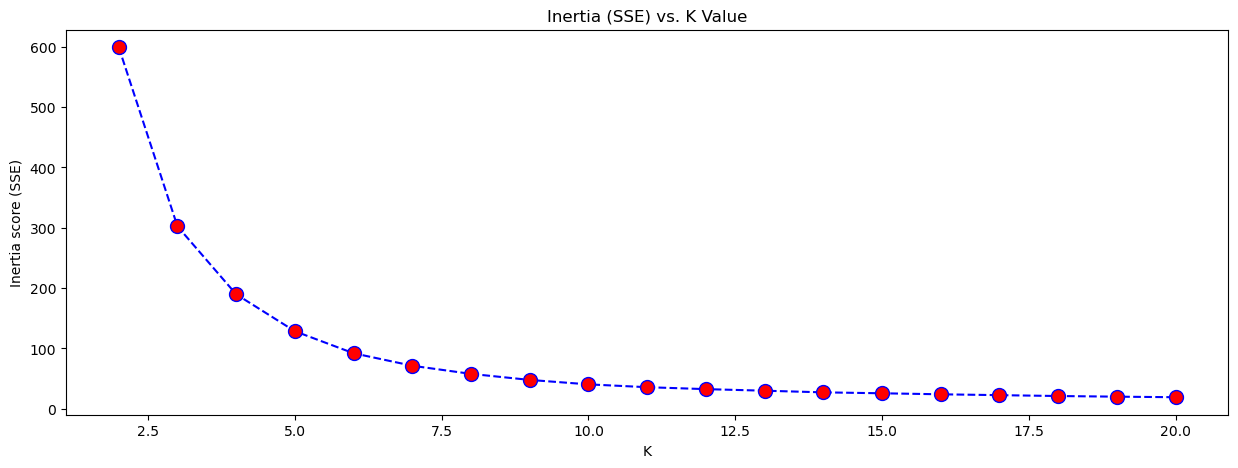

In [69]:
plt.figure(figsize=(15,5))
plt.plot(k1,inertia_s1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Inertia (SSE) vs. K Value')
plt.xlabel('K')
plt.ylabel('Inertia score (SSE)')

In [71]:
#Cluster chosen

kmeans = KMeans(n_clusters=4,random_state=125,max_iter=100).fit(df_clust)
sscore = ss(df_clust,kmeans.labels_)
inertia= kmeans.inertia_

print('sscore',sscore)
print('inertia',inertia)

# save k-means
pkl_filename = "kmeans_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(kmeans, file)

/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


sscore 0.7788187458320237
inertia 189.75270232700427


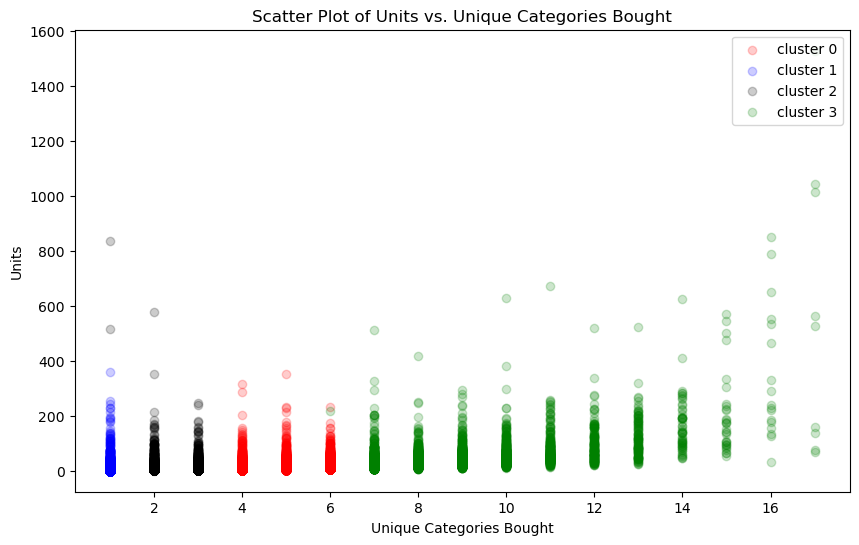

In [72]:


df_features_overall['cluster_ids'] = kmeans.labels_
df_cluster_summary = df_features_overall.groupby('cluster_ids').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})
#print(df_features_overall)


cluster0 = df_features_overall[df_features_overall['cluster_ids'] == 0]
cluster1 = df_features_overall[df_features_overall['cluster_ids'] == 1]
cluster2 = df_features_overall[df_features_overall['cluster_ids'] == 2]
cluster3 = df_features_overall[df_features_overall['cluster_ids'] == 3]

#Scatter plot
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.scatter(cluster0['unique_categories_bought'], cluster0['units'], color='red', alpha=0.2, label = 'cluster 0')
plt.scatter(cluster1['unique_categories_bought'], cluster1['units'], color='blue', alpha=0.2, label = 'cluster 1')
plt.scatter(cluster2['unique_categories_bought'], cluster2['units'], color='black', alpha=0.2, label = 'cluster 2')
plt.scatter(cluster3['unique_categories_bought'], cluster3['units'], color='green', alpha=0.2, label = 'cluster 3')
plt.title('Scatter Plot of Units vs. Unique Categories Bought')
plt.xlabel('Unique Categories Bought')
plt.ylabel('Units')
plt.legend(loc='upper right')

Text(0, 0.5, 'Units')

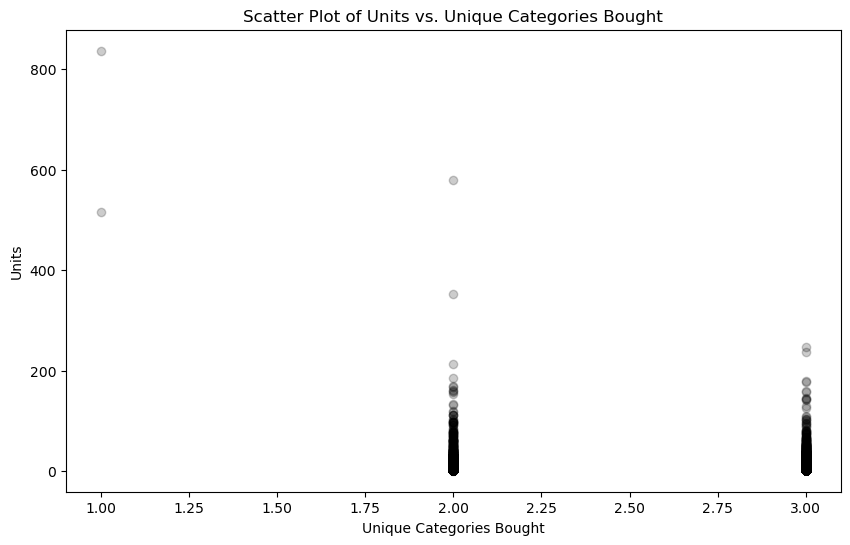

In [73]:
#Scatter plot
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.scatter(cluster2['unique_categories_bought'], cluster2['units'], color='black', alpha=0.2)
plt.title('Scatter Plot of Units vs. Unique Categories Bought')
plt.xlabel('Unique Categories Bought')
plt.ylabel('Units')

             client_bill_email  share (%)
cluster_ids                              
0                        15375  12.317836
1                        65942  52.830098
2                        38144  30.559450
3                         5358   4.292616


<Axes: ylabel='share (%)'>

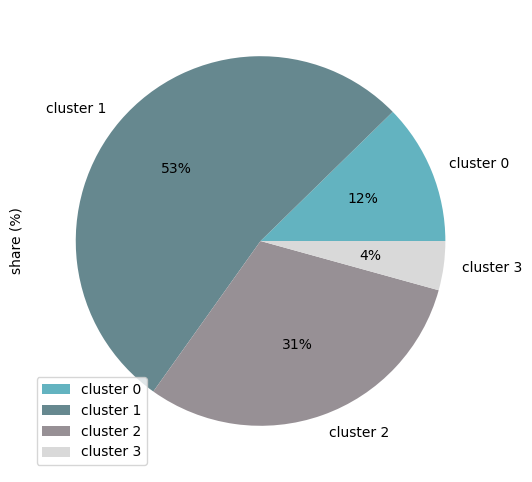

In [74]:
#How many clients have each cluster
df_size_clusters = df_features_overall.reset_index().groupby('cluster_ids').agg({
    'client_bill_email': 'nunique',  # Count of unique clients
})
df_size_clusters['share (%)']=df_size_clusters['client_bill_email']/[df_size_clusters['client_bill_email'].sum()]*100
print(df_size_clusters)

colors=['#63b3c0','#66888f','#979095','#d9d9d9']
sns.set_palette(sns.color_palette(colors))
df_size_clusters.plot.pie(y='share (%)', figsize=(6,6), labels=['cluster 0','cluster 1','cluster 2','cluster 3'],autopct='%.0f%%')

cluster_ids
0    14.859512
1     2.145037
2     5.746775
3    46.547592
Name: units, dtype: float64
   cluster_ids      units     orders  unique_products_bought  \
0            0  14.859512   6.885593               14.279805   
1            1   2.145037   1.290498                2.017925   
2            2   5.746775   2.806995                5.524827   
3            3  46.547592  20.391751               44.476297   

   unique_categories_bought  
0                  4.705626  
1                  1.000000  
2                  2.340997  
3                  8.561963  


Text(0, 0.5, 'Number of orders')

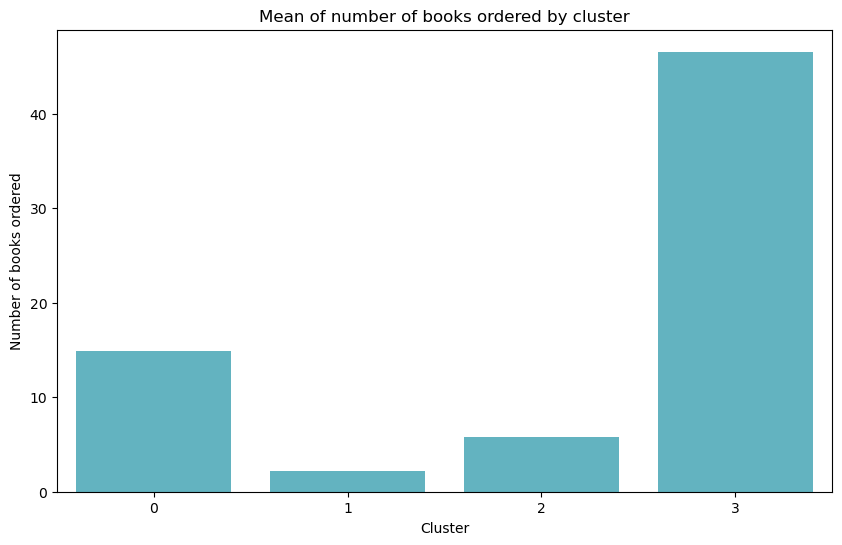

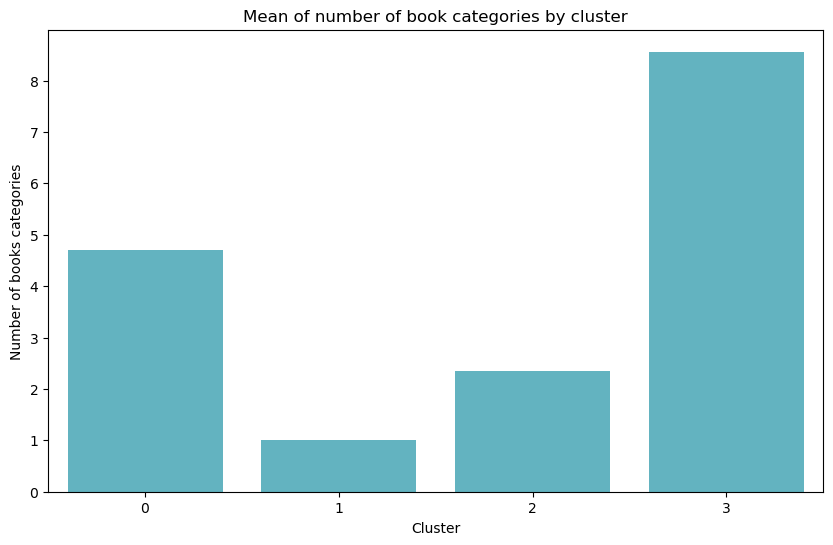

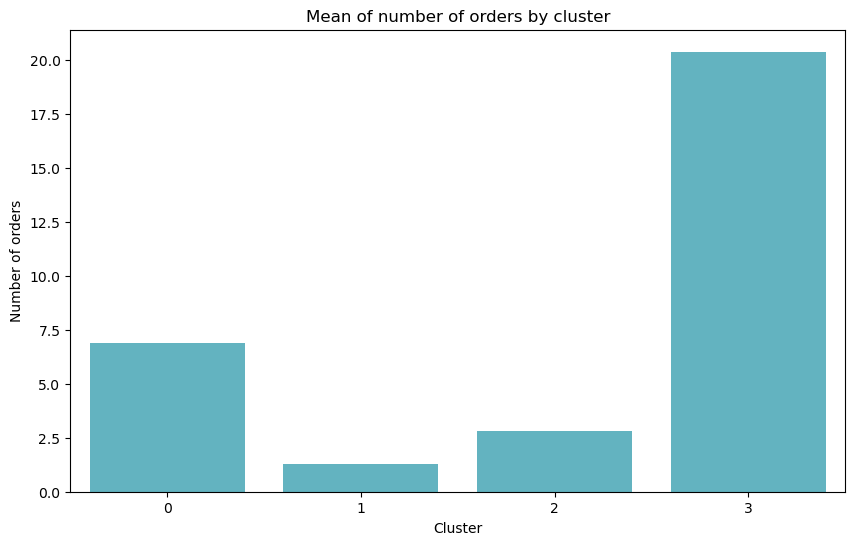

In [75]:

#### Graph to get a profil for each clusters
df_recap = df_features_overall.groupby('cluster_ids')['units'].mean()
print(df_recap)

avg_df = df_features_overall.groupby(['cluster_ids'], as_index=False).mean()
print(avg_df)

#Number of books by cluster
plt.figure(figsize=(10, 6))
hist = plt.bar(avg_df['cluster_ids'], avg_df['units'])
plt.xticks([0,1,2,3])
plt.xlim(-0.5, 3.5)
plt.title('Mean of number of books ordered by cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of books ordered')

#Number of categories by cluster
plt.figure(figsize=(10, 6))
hist = plt.bar(avg_df['cluster_ids'], avg_df['unique_categories_bought'])
plt.xticks([0,1,2,3])
plt.xlim(-0.5, 3.5)
plt.title('Mean of number of book categories by cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of books categories')

#Number of orders by cluster
plt.figure(figsize=(10, 6))
hist = plt.bar(avg_df['cluster_ids'], avg_df['orders'])
plt.xticks([0,1,2,3])
plt.xlim(-0.5, 3.5)
plt.title('Mean of number of orders by cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of orders')

In [76]:
#Prepare data for PCA with weight of categories in purchase for each client
df_sales2 = df[['client_bill_email', 'quantity', 'Famille']]

# Replace NA values in 'Famille' column with 'Unknown'
df_sales2['Famille'] = df_sales2['Famille'].fillna('Unknown')

df_category_features_s = df_sales2.groupby(['client_bill_email', 'Famille']).agg({'quantity':'sum'})
df_category_features_s=df_category_features_s.reset_index()

# add overall sales
df_category_features_s = df_category_features_s.merge(df_features_overall[['units']], on=['client_bill_email'])

# convert to %
df_category_features_s['Qty_perc'] = df_category_features_s['quantity']/df_category_features_s['units']
df_category_features_s= df_category_features_s.reset_index()


# pivot to have cateegories in columns
df_category_features_s = df_category_features_s.pivot(index='client_bill_email', columns='Famille', values='Qty_perc')

df_features = df_features_overall.merge(df_category_features_s,on='client_bill_email',how='left')

df_features = df_features.fillna(0).reset_index()
df_features = df_features.drop('client_bill_email', axis = 1)
display(df_features)


/var/folders/fl/rm_vjrmx2wbc9bzm_ht_0sl80000gn/T/ipykernel_37225/3416100965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales2['Famille'] = df_sales2['Famille'].fillna('Unknown')


,units,orders,unique_products_bought,unique_categories_bought,cluster_ids,ART ET SPECTACLE,BD,DIVERS,DROIT ET AFFAIRES,HISTOIRE & POLITIQUE,...,LOISIRS PRATIQUE,PAPETERIE,PARALIBRAIRIE,PSYCHO ET DEVLPT,SCIENCES HUMAINES,SCIENCES TECHNIQUES,SCOLAIRE,TOURISME,Unknown,VIE SPIRITUELLE
0,19,10,19,1,1,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.00,0.0
1,1,1,1,1,1,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0
2,14,3,14,5,0,0.0,0.071429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.214286,0.0,0.357143,0.0,0.0,0.00,0.0
3,8,6,8,4,0,0.0,0.000000,0.0,0.0,0.0,...,0.5,0.0,0.0,0.125000,0.0,0.000000,0.0,0.0,0.25,0.0
4,1,1,1,1,1,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124814,5,2,5,5,0,0.2,0.000000,0.0,0.0,0.0,...,0.2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.2,0.20,0.0
124815,2,1,2,1,1,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,1.0
124816,1,1,1,1,1,0.0,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0
124817,1,1,1,1,1,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.00,0.0


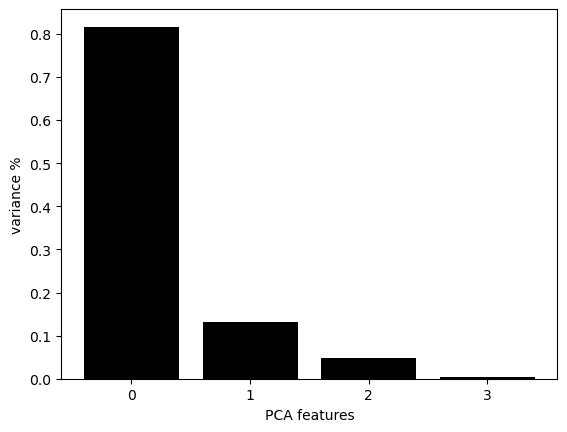

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_features = df_features[['units', 'orders', 'unique_products_bought', 'unique_categories_bought']]
#df_features = df_features[['ART ET SPECTACLE', 'BD', 'DROIT ET AFFAIRES', 'HISTOIRE & POLITIQUE', 'LOISIRS PRATIQUE', 'PAPETERIE', 'PARALIBRAIRIE', 'PSYCHO ET DEVLPT', 'SCIENCES HUMAINES', 'SCIENCES TECHNIQUES', 'SCOLAIRE']]


standardScaler = StandardScaler()
standardScaler.fit(df_features)
X_scaled =  standardScaler.transform(df_features)

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_scaled)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

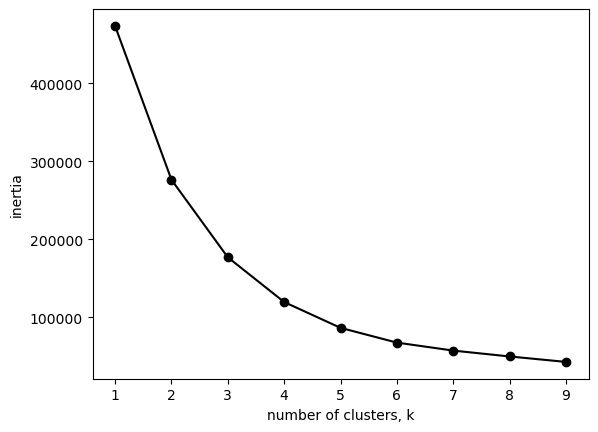

In [79]:

ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

   units  orders  unique_products_bought  unique_categories_bought
0     19      10                      19                         1
1      1       1                       1                         1
2     14       3                      14                         5
3      8       6                       8                         4
4      1       1                       1                         1


/Users/FabienCalderini/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


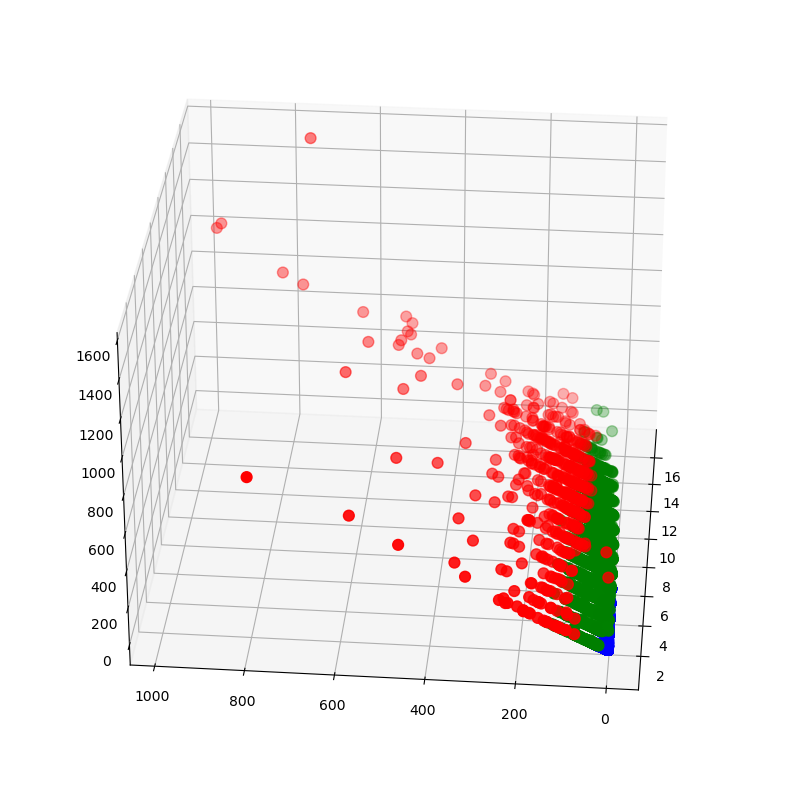

In [80]:
print(df_features.head())
model = KMeans(n_clusters=3)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
df_features["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_features.unique_categories_bought[df_features.label == 0], df_features["unique_products_bought"][df_features.label == 0], df_features["units"][df_features.label == 0], c='blue', s=60)
ax.scatter(df_features.unique_categories_bought[df_features.label == 1], df_features["unique_products_bought"][df_features.label == 1], df_features["units"][df_features.label == 1], c='red', s=60)
ax.scatter(df_features.unique_categories_bought[df_features.label == 2], df_features["unique_products_bought"][df_features.label == 2], df_features["units"][df_features.label == 2], c='green', s=60)

ax.view_init(30, 185)
plt.show()

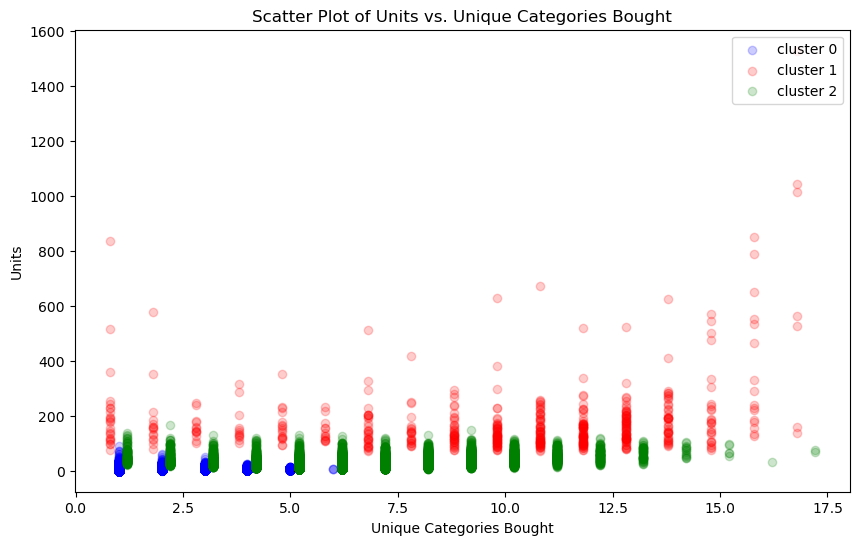

In [83]:

cluster0 = df_features[df_features['label'] == 0]
cluster1 = df_features[df_features['label'] == 1]
cluster2 = df_features[df_features['label'] == 2]

#Scatter plot
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.scatter(cluster0['unique_categories_bought'], cluster0['units'], color='blue', alpha=0.2, label =('cluster 0'))
plt.scatter(cluster1['unique_categories_bought']-0.2, cluster1['units'], color='red', alpha=0.2, label = 'cluster 1')
plt.scatter(cluster2['unique_categories_bought']+0.2, cluster2['units'], color='green', alpha=0.2, label = 'cluster 2')
plt.title('Scatter Plot of Units vs. Unique Categories Bought')
plt.xlabel('Unique Categories Bought')
plt.ylabel('Units')
plt.legend(loc='upper right')

   units  orders  unique_products_bought  unique_categories_bought  label
0     19      10                      19                         1      0
1      1       1                       1                         1      0
2     14       3                      14                         5      2
3      8       6                       8                         4      0
4      1       1                       1                         1      0
        units  share (%)
label                   
0      369464  44.061442
1       94478  11.267233
2      374578  44.671326
label
0      3.342900
1    177.924670
2     27.210373
Name: units, dtype: float64
   label       units     orders  unique_products_bought  \
0      0    3.342900   1.858598                3.193717   
1      1  177.924670  67.389831              168.676083   
2      2   27.210373  12.065451               26.087317   

   unique_categories_bought  
0                  1.665135  
1                 10.045198  
2                  6.1

Text(0, 0.5, 'Number of orders')

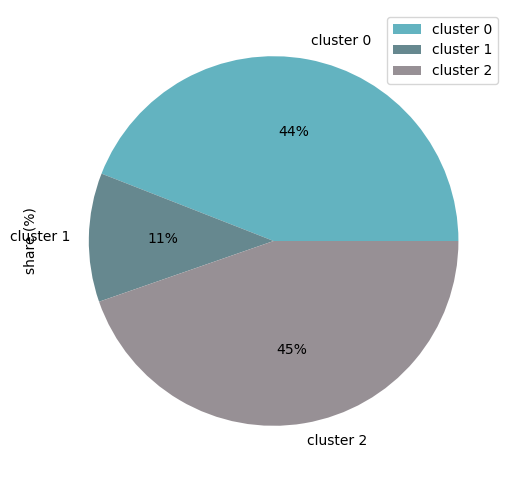

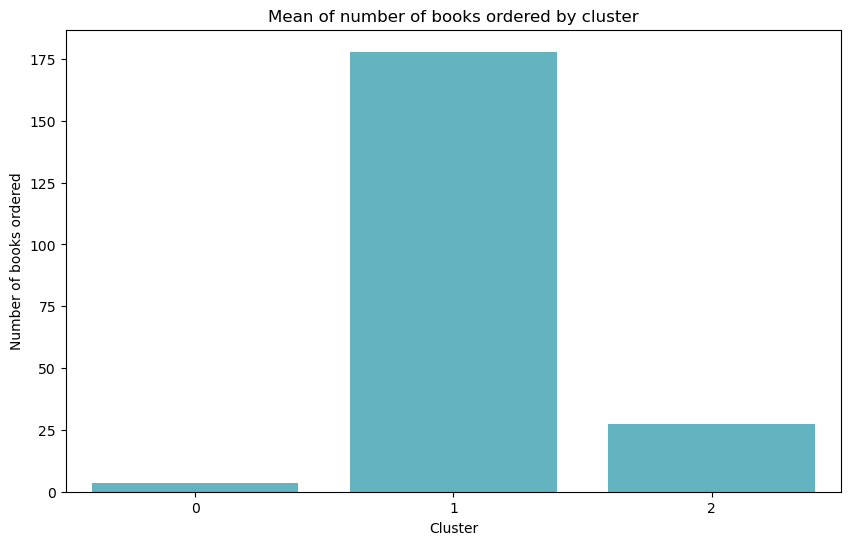

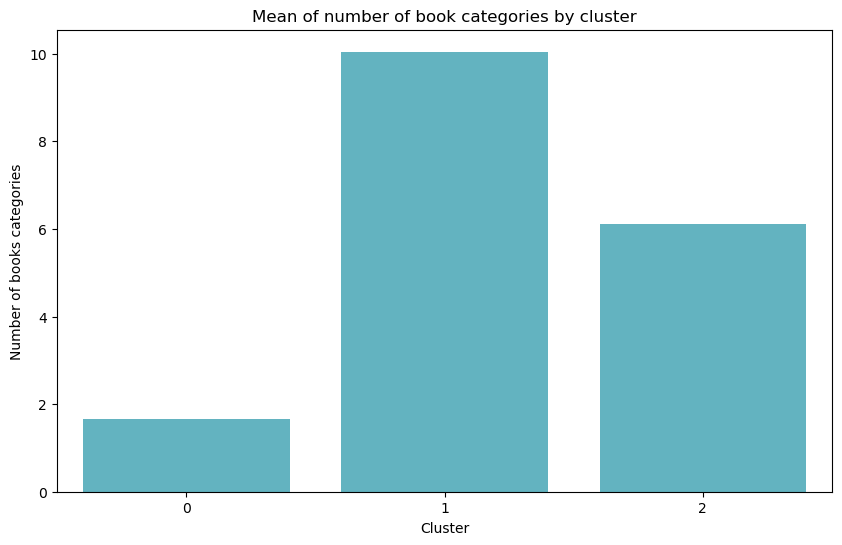

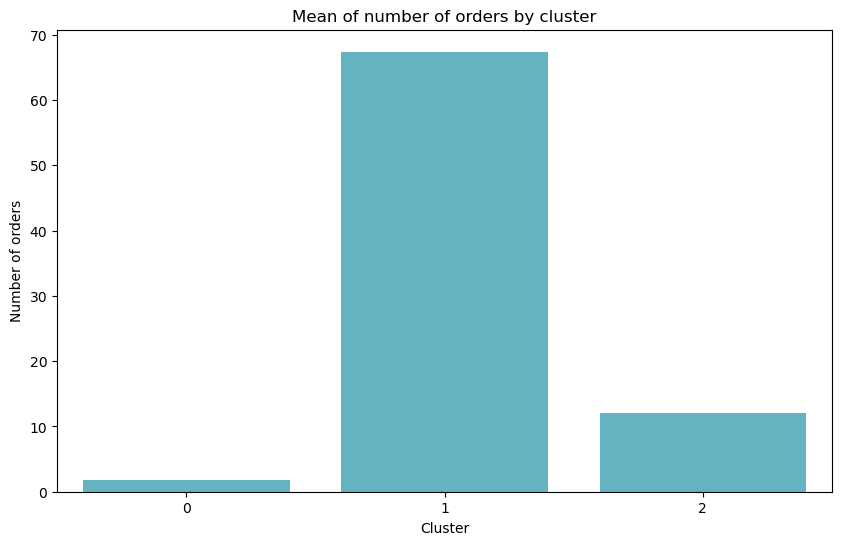

In [85]:
print(df_features.head())
#How many clients have each cluster
df_size_clusters = df_features.reset_index().groupby('label').agg({
    'units': 'sum',  # Number of books sold
})
df_size_clusters['share (%)']=df_size_clusters['units']/[df_size_clusters['units'].sum()]*100
print(df_size_clusters)

colors=['#63b3c0','#66888f','#979095']
sns.set_palette(sns.color_palette(colors))
df_size_clusters.plot.pie(y='share (%)', figsize=(6,6), labels=['cluster 0','cluster 1','cluster 2'],autopct='%.0f%%')

#### Graph to get a profil for each clusters
df_recap = df_features.groupby('label')['units'].mean()
print(df_recap)

avg_df = df_features.groupby(['label'], as_index=False).mean()
print(avg_df)

#Number of books by cluster
plt.figure(figsize=(10, 6))
hist = plt.bar(avg_df['label'], avg_df['units'])
plt.xticks([0,1,2,3])
plt.xlim(-0.5, 2.5)
plt.title('Mean of number of books ordered by cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of books ordered')

#Number of categories by cluster
plt.figure(figsize=(10, 6))
hist = plt.bar(avg_df['label'], avg_df['unique_categories_bought'])
plt.xticks([0,1,2,3])
plt.xlim(-0.5, 2.5)
plt.title('Mean of number of book categories by cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of books categories')

#Number of orders by cluster
plt.figure(figsize=(10, 6))
hist = plt.bar(avg_df['label'], avg_df['orders'])
plt.xticks([0,1,2,3])
plt.xlim(-0.5, 2.5)
plt.title('Mean of number of orders by cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of orders')